<a href="https://colab.research.google.com/github/MRM07/EverythingDataScience/blob/master/TPOT_for_Telecom_Churning_Dataset_with_Model_Interpetation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict the risk of Customer Churning in Telecom Data

Churning occurs when customers/subscibers stop doing business with a company or service.
Here we'll use TPOT to create an Automated ML platform to predict the churn risk.


In [0]:
!pip install tpot

     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 153kB 27.5MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11955 sha256=e2f8769e6b15caa4dc921d64184d06018469b2e2cf035620598bb3a5354ea424
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [0]:

# Import required libraries
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np

In [0]:
# Loading the data
customer_churn_dataset = pd.read_csv('data2.csv')
customer_churn_dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2967-MXRAV,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.80,No
1,8992-CEUEN,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No
2,9318-NKNFC,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes
3,9975-SKRNR,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90,No
4,1423-BMPBQ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19.00,No


# EDA

In [0]:
customer_churn_dataset.groupby("gender").Churn.value_counts()

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64

In [0]:
#Dataypes of all the individual features
customer_churn_dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [0]:
#Let's check for null values in the dataset
customer_churn_dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [0]:
customer_churn_dataset.dtypes
churn_feature_dataset=customer_churn_dataset.drop(["customerID", "Churn"], axis= 1)

In [0]:
target_value= customer_churn_dataset["Churn"]

In [0]:
one_hot_encoded_feature_set= pd.get_dummies(churn_feature_dataset)

In [0]:
one_hot_encoded_feature_set.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,18.80,18.80,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,0,1,18.85,18.85,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
2,0,1,18.85,18.85,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,0,1,18.90,18.90,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
4,0,1,19.00,19.00,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_feature_set, target_value, test_size= 0.20)

# Data Wrangling

The first and most important step in using TPOT on any data set is to rename the target class/response variable to class.

In [0]:
# """
# Let's create a funcion which can be used to identify the reponse variable based on user input. 
# Here "Churn" prediction is the requirement.
# """
# def target(df, response ):
#   df.rename(columns={response: 'class'}, inplace=True)
  

In [0]:
# target(customer_churn_dataset, "Churn")



At present, TPOT requires all the data to be in numerical format. As we can see below, our data set has many categorical variables which contain non-numerical values: **gender, PhoneService, Multiple lines, Partner, Dependent, PaymentMethod, Paperless, TechSupport, StreamingTV, StreamingMovies, Contract etc.**

In [0]:
# for cat in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod' ]:
#     print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, customer_churn_dataset[cat].unique().size))

Number of levels in category 'gender':  2.00 
Number of levels in category 'Partner':  2.00 
Number of levels in category 'Dependents':  2.00 
Number of levels in category 'PhoneService':  2.00 
Number of levels in category 'MultipleLines':  3.00 
Number of levels in category 'InternetService':  3.00 
Number of levels in category 'OnlineSecurity':  3.00 
Number of levels in category 'OnlineBackup':  3.00 
Number of levels in category 'DeviceProtection':  3.00 
Number of levels in category 'TechSupport':  3.00 
Number of levels in category 'StreamingMovies':  3.00 
Number of levels in category 'StreamingTV':  3.00 
Number of levels in category 'Contract':  3.00 
Number of levels in category 'PaperlessBilling':  2.00 
Number of levels in category 'PaymentMethod':  4.00 


In [0]:
# for cat in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod' ]:
#     print("Number of levels in category '{0}': {1} ".format(cat, customer_churn_dataset[cat].unique()))

Number of levels in category 'gender': ['Male' 'Female'] 
Number of levels in category 'Partner': ['Yes' 'No'] 
Number of levels in category 'Dependents': ['Yes' 'No'] 
Number of levels in category 'PhoneService': ['Yes' 'No'] 
Number of levels in category 'MultipleLines': ['No' 'No phone service' 'Yes'] 
Number of levels in category 'InternetService': ['No' 'DSL' 'Fiber optic'] 
Number of levels in category 'OnlineSecurity': ['No internet service' 'No' 'Yes'] 
Number of levels in category 'OnlineBackup': ['No internet service' 'No' 'Yes'] 
Number of levels in category 'DeviceProtection': ['No internet service' 'No' 'Yes'] 
Number of levels in category 'TechSupport': ['No internet service' 'No' 'Yes'] 
Number of levels in category 'StreamingMovies': ['No internet service' 'No' 'Yes'] 
Number of levels in category 'StreamingTV': ['No internet service' 'No' 'Yes'] 
Number of levels in category 'Contract': ['One year' 'Month-to-month' 'Two year'] 
Number of levels in category 'PaperlessBi

In [0]:
# customer_churn_dataset["gender"]=customer_churn_dataset["gender"].map({'Male': 0, 'Female': 1}) 
# customer_churn_dataset["Partner"]= customer_churn_dataset["Partner"].map({'Yes': 0, 'No': 1})
# customer_churn_dataset["Dependents"]= customer_churn_dataset["Dependents"].map({'Yes': 0, 'No': 1})
# customer_churn_dataset["PhoneService"]= customer_churn_dataset["PhoneService"].map({'Yes': 0, 'No': 1})
# customer_churn_dataset["MultipleLines"]= customer_churn_dataset["MultipleLines"].map({'No': 0, 'No phone service': 1, 'Yes': 2})
# customer_churn_dataset["InternetService"]= customer_churn_dataset["InternetService"].map({'No': 0, 'DSL': 1, 'Fiber optic': 2 })
# customer_churn_dataset["OnlineSecurity"]= customer_churn_dataset["OnlineSecurity"].map({'No internet service': 0, 'No': 1, 'Yes': 2})
# customer_churn_dataset["OnlineBackup"]= customer_churn_dataset["OnlineBackup"].map({'No internet service': 0, 'No': 1, 'Yes': 2})
# customer_churn_dataset["DeviceProtection"]= customer_churn_dataset["DeviceProtection"].map({'No internet service': 0, 'No': 1, 'Yes': 2})
# customer_churn_dataset["TechSupport"]= customer_churn_dataset["TechSupport"].map({'No internet service': 0, 'No': 1, 'Yes': 2})
# customer_churn_dataset["StreamingMovies"]= customer_churn_dataset["StreamingMovies"].map({'No internet service': 0, 'No': 1, 'Yes': 2})
# customer_churn_dataset["StreamingTV"]= customer_churn_dataset["StreamingTV"].map({'No internet service': 0, 'No': 1, 'Yes': 2})
# customer_churn_dataset["Contract"]= customer_churn_dataset["Contract"].map({'One year': 0, 'Month-to-month': 1, 'Two year': 2})
# customer_churn_dataset["PaymentMethod"]= customer_churn_dataset["PaymentMethod"].map({'Mailed check':0, 'Electronic check' :1 ,'Bank transfer (automatic)':2, 
#  'Credit card (automatic)': 3})
# customer_churn_dataset["PaperlessBilling"]= customer_churn_dataset["PaperlessBilling"].map({'No' :0, 'Yes': 1})


In [0]:
# # customer_churn_dataset["gender"]=customer_churn_dataset["gender"].map({'Male': 0, 'Female': 1})
# customer_churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,class
0,2967-MXRAV,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,18.80,18.80,No
1,8992-CEUEN,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,18.85,18.85,No
2,9318-NKNFC,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,18.85,18.85,Yes
3,9975-SKRNR,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,18.90,18.90,No
4,1423-BMPBQ,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,19.00,19.00,No


In [0]:
# from sklearn.model_selection import train_test_split
# X= customer_churn_dataset.drop(['customerID', 'class'], axis= 1)
# y= customer_churn_dataset["class"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

In [0]:
from tpot import TPOTClassifier

In [0]:
"""
We have the freedom to set up our won configuration even when automating the pipelines. 
This will help us narrow down to using only those pipelines which can explain feature importances.
"""
tpot_config = {
    'sklearn.naive_bayes.GaussianNB': {
    },
    'sklearn.ensemble.RandomForestClassifier' : {
    },
    'sklearn.ensemble.GradientBoostingClassifier':{
    },
    
    'sklearn.ensemble.ExtraTreesClassifier':{
    },
    'xgboost.XGBClassifier':{
    }
}


In [0]:
tpot = TPOTClassifier(generations= 20, verbosity=3, max_time_mins=8, max_eval_time_mins=0.04, population_size=20)

In [0]:
tpot_model=tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

30 operators have been imported by TPOT.


Skipped pipeline #2 due to time out. Continuing to the next pipeline.
Skipped pipeline #7 due to time out. Continuing to the next pipeline.
Skipped pipeline #14 due to time out. Continuing to the next pipeline.
Skipped pipeline #16 due to time out. Continuing to the next pipeline.
Skipped pipeline #20 due to time out. Continuing to the next pipeline.
Skipped pipeline #25 due to time out. Continuing to the next pipeline.
_pre_test decorator: _random_mutation_operator: num_test=0 could not convert string to float: 'No'.
_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative.
Skipped pipeline #29 due to time out. Continuing to the next pipeline.
Skipped pipeline #31 due to time out. Continuing to the next pipeline.
Skipped pipeline #34 due to time out. Continuing to the next pipeline.
Skipped pipeline #37 due to time out. Continuing to the next pipeline.
Skipped pipeline #43 due to time out. Continuing to the next pipeline.
Skipped pipeline #48 due to time

ValueError: ignored

In [0]:
# Get the best model
extracted_best_model = tpot.fitted_pipeline_.steps[-1][1]

In [0]:
# Access it's features
extracted_best_model.feature_importances_

array([0.01275497, 0.01257273, 0.0010522 , 0.01417047, 0.13685052,
       0.01390486, 0.04213004, 0.27273944, 0.03584461, 0.01721212,
       0.01457608, 0.03364326, 0.02502969, 0.04446804, 0.21198472,
       0.04004519, 0.03451863, 0.01820524, 0.01829719], dtype=float32)

# IMPORTANT

*In the above example, the best model based on the pipeline was RandomForestClassifier . This model indeed has the attribute feature_importances_. In the case where the best model does not have an attribute feature_importances_, the exact same code will not work. We have to take care of such cases, ex- if our best estimator was LogisticRegeression or NaiveBayes

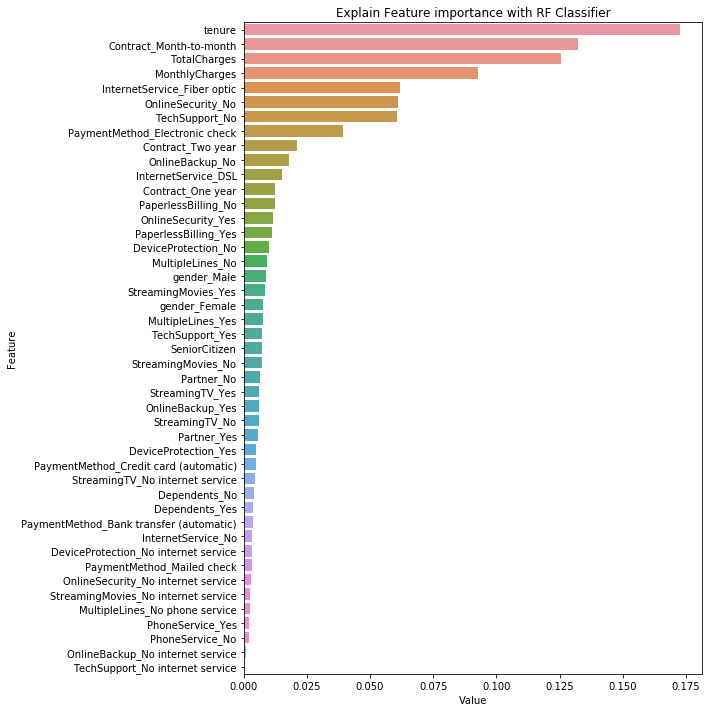

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(extracted_best_model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Explain Feature importance with RF Classifier')
plt.tight_layout()
plt.show()



In [0]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

In [0]:
# Create the data that we will plot
def pdp_plots(model, feature_name):
  feature_names = [i for i in data.columns ]
  pdp_churn = pdp.pdp_isolate(model=tpot_model, dataset=X_test, model_features=feature_names, feature= feature_name )
  # plot it
  pdp.pdp_plot(pdp_churn, feature_name)
  plt.show()

In [0]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 1.3MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=0beaef4813914e01875c46c3c649ea59ee7f7f5da542f811b9368fba3e73ef17
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [0]:
from pdpbox import pdp, get_dataset

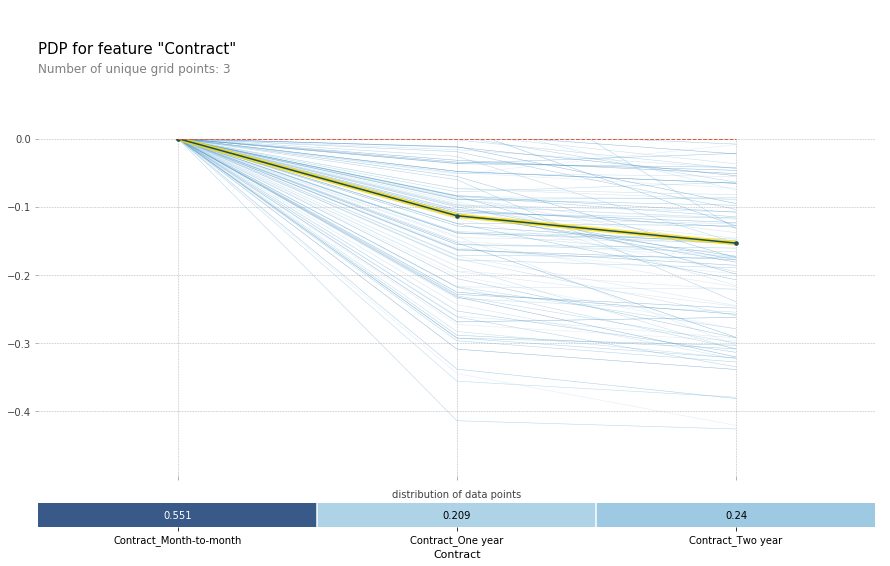

In [41]:
pdp_contract = pdp.pdp_isolate(model=extracted_best_model, dataset=one_hot_encoded_feature_set,
                             model_features=list(one_hot_encoded_feature_set.columns),
                             feature=['Contract_Month-to-month',	'Contract_One year',	'Contract_Two year'])
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_contract,
                         feature_name='Contract',
                         center=True,
                         plot_lines=True,
                         frac_to_plot=100,
                         plot_pts_dist=True)

In [42]:
pdp_contract.pdp

array([0.30311048, 0.1899035 , 0.1497724 ])

In [0]:
['StreamingMovies_No',	'StreamingMovies_No internet service',	'StreamingMovies_Yes']

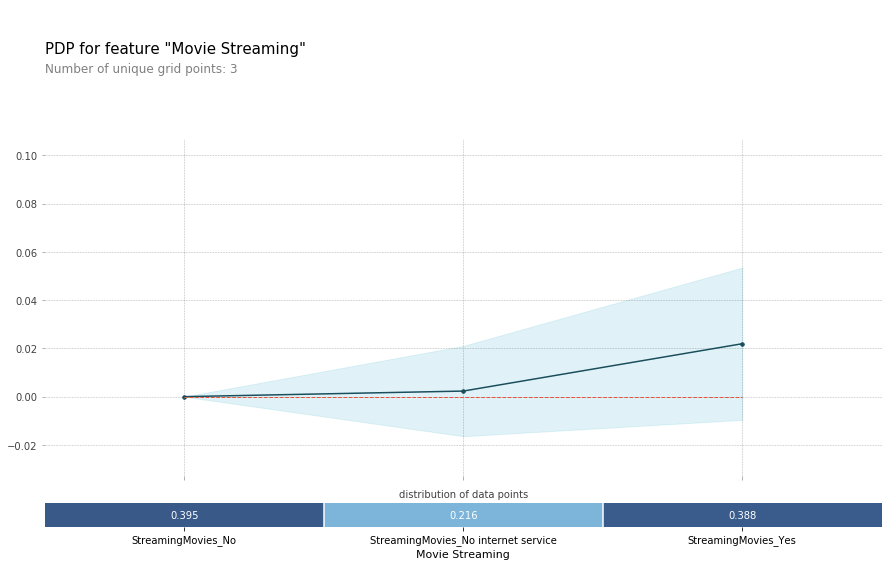

In [43]:
pdp_embark = pdp.pdp_isolate(model=extracted_best_model, dataset=one_hot_encoded_feature_set,
                             model_features=list(one_hot_encoded_feature_set.columns),
                             feature=['StreamingMovies_No',	'StreamingMovies_No internet service',	'StreamingMovies_Yes'])
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_embark,
                         feature_name='Movie Streaming',
                         center=True,
                         plot_lines=False,
                         frac_to_plot=100,
                         
                         plot_pts_dist=True)

In [40]:
pdp_embark.pdp

array([0.2551703 , 0.25748464, 0.27709675])

In [0]:
['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',	'PaymentMethod_Mailed check']

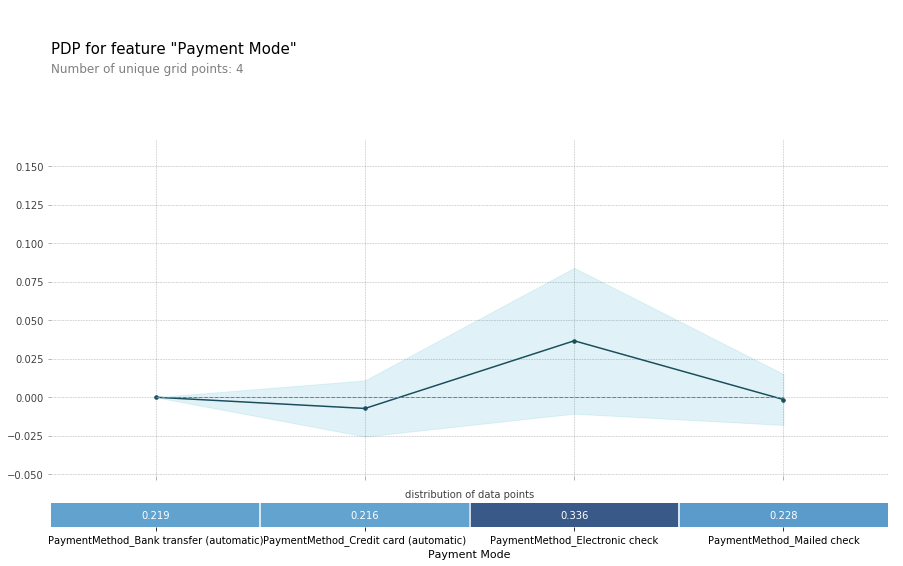

In [45]:
pdp_payment = pdp.pdp_isolate(model=extracted_best_model, dataset=one_hot_encoded_feature_set,
                             model_features=list(one_hot_encoded_feature_set.columns),
                             feature=['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',	'PaymentMethod_Mailed check'])
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_payment,
                         feature_name='Payment Mode',
                         center=True,
                         
                         frac_to_plot=100,
                         plot_pts_dist=True)

In [62]:
from sklearn.inspection import partial_dependence
partial_dependence(extracted_best_model, features=[12, 13, 14], X=one_hot_encoded_feature_set, grid_resolution=2
            ) 

(array([[[[0.26262924, 0.27186698],
          [0.26597121, 0.27526353]],
 
         [[0.25064377, 0.25990539],
          [0.25440957, 0.26372578]]]]),
 [array([0., 1.]), array([0., 1.]), array([0., 1.])])

In [63]:
!pip install shap

     |████████████████████████████████| 245kB 8.5MB/s 
  Created wheel for shap: filename=shap-0.30.1-cp36-cp36m-linux_x86_64.whl size=360445 sha256=30c30be35d0d37a988ebaa3cb499d0f788bead72fc79cbfe9ac27f926a0db0cc
  Stored in directory: /root/.cache/pip/wheels/62/94/5e/feb9af12d63a719a32266a29ca564b4dc37b4755052aca6859
Successfully built shap


In [0]:
import shap 
  
shap_values = shap.TreeExplainer(extracted_best_model).shap_values(X_test)

In [66]:
shap_values

[array([[-0.00761896, -0.08706273, -0.00412432, ..., -0.00208895,
         -0.02197881, -0.0008339 ],
        [ 0.00186676,  0.03547981,  0.02306951, ..., -0.00028607,
         -0.03092566, -0.00071344],
        [ 0.0022913 , -0.023578  ,  0.03137846, ..., -0.00096042,
          0.014267  ,  0.00126782],
        ...,
        [ 0.0035465 ,  0.11327175, -0.06190963, ..., -0.00175902,
         -0.03066546, -0.00022356],
        [ 0.00053909,  0.05744248, -0.04250636, ..., -0.00119312,
          0.01235803,  0.00088594],
        [ 0.00116422,  0.04572222,  0.01709858, ..., -0.00048661,
          0.01270482, -0.00014396]]),
 array([[ 0.00761896,  0.08706273,  0.00412432, ...,  0.00208895,
          0.02197881,  0.0008339 ],
        [-0.00186676, -0.03547981, -0.02306951, ...,  0.00028607,
          0.03092566,  0.00071344],
        [-0.0022913 ,  0.023578  , -0.03137846, ...,  0.00096042,
         -0.014267  , -0.00126782],
        ...,
        [-0.0035465 , -0.11327175,  0.06190963, ...,  0.00175902,
          0.03066546,  0.00022356],
        [-0.00053909, -0.05744248,  0.04250636, ...,  0.00119312,
         -0.01235803, -0.00088594],
        [-0.00116422, -0.04572222, -0.01709858, ...,  0.00048661,
         -0.01270482,  0.00014396]])]

# SHAP SUMMARY PLOT

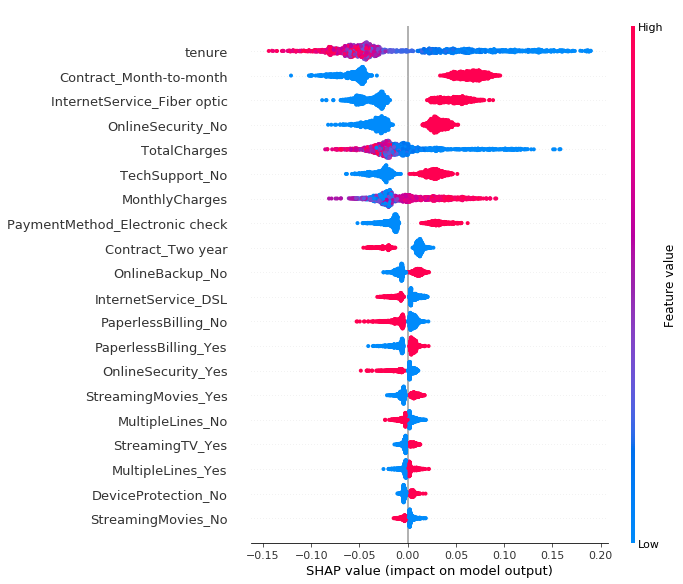

In [67]:
shap.initjs()
shap.summary_plot(shap_values[1], X_test)

**Vertical location shows what feature it is depicting**


**Color shows whether that feature was high or low for that row of the dataset**


**Horizontal location shows whether the effect of that value caused a higher or lower prediction.**

Now's let's make prediction for a single row and anaalyze through SHAP 

In [69]:
row_to_show = 28
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


extracted_best_model.predict_proba(data_for_prediction_array)

array([[0.74114136, 0.25885864]])

The above is a raw prediction that tells us that the chances of churning are 25%

In [0]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(extracted_best_model)

# # Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [72]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)